4.20 Optimal vehicle speed scheduling

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [3]:
#  n, a, b, c, d, smin, smax, tau_min, tau_max
n =   100
a =     1
b =     6
c =    10
d = np.array(
    [1.9501, 1.2311, 1.6068, 1.4860, 1.8913, 1.7621, 1.4565, 1.0185, 1.8214, 1.4447, 
     1.6154, 1.7919, 1.9218, 1.7382, 1.1763, 1.4057, 1.9355, 1.9169, 1.4103, 1.8936, 
     1.0579, 1.3529, 1.8132, 1.0099, 1.1389, 1.2028, 1.1987, 1.6038, 1.2722, 1.1988, 
     1.0153, 1.7468, 1.4451, 1.9318, 1.4660, 1.4186, 1.8462, 1.5252, 1.2026, 1.6721,
     1.8381, 1.0196, 1.6813, 1.3795, 1.8318, 1.5028, 1.7095, 1.4289, 1.3046, 1.1897, 
     1.1934, 1.6822, 1.3028, 1.5417, 1.1509, 1.6979, 1.3784, 1.8600, 1.8537, 1.5936, 
     1.4966, 1.8998, 1.8216, 1.6449, 1.8180, 1.6602, 1.3420, 1.2897, 1.3412, 1.5341, 
     1.7271, 1.3093, 1.8385, 1.5681, 1.3704, 1.7027, 1.5466, 1.4449, 1.6946, 1.6213, 
     1.7948, 1.9568, 1.5226, 1.8801, 1.1730, 1.9797, 1.2714, 1.2523, 1.8757, 1.7373, 
     1.1365, 1.0118, 1.8939, 1.1991, 1.2987, 1.6614, 1.2844, 1.4692, 1.0648, 1.9883])
smin = np.array(
    [0.7828, 0.6235, 0.7155, 0.5340, 0.6329, 0.4259, 0.7798, 0.9604, 0.7298, 0.8405, 0.4091, 
     0.5798, 0.9833, 0.8808, 0.6611, 0.7678, 0.9942, 0.2592, 0.8029, 0.2503, 0.6154, 0.5050,
     1.0744, 0.2150, 0.9680, 1.1708, 1.1901, 0.9889, 0.6387, 0.6983, 0.4140, 0.8435, 0.5200,
     1.1601, 0.9266, 0.6120, 0.9446, 0.4679, 0.6399, 1.1334, 0.8833, 0.4126, 1.0392, 0.8288,
     0.3338, 0.4071, 0.8072, 0.8299, 0.5705, 0.7751, 0.6514, 0.2439, 0.2272, 0.5127, 0.2129,
     0.5840, 0.8831, 0.2928, 0.2353, 0.8124, 0.8085, 0.2158, 0.2164, 0.3901, 0.7869, 0.2576,
     0.5676, 0.8315, 0.9176, 0.8927, 0.2841, 0.6544, 0.6418, 0.5533, 0.3536, 0.8756, 0.8992,
     0.9275, 0.6784, 0.7548, 0.3210, 0.6508, 0.9159, 1.0928, 0.4731, 0.4548, 1.0656, 0.4324,
     1.0049, 1.1084, 0.4319, 0.4393, 0.2498, 0.2784, 0.8408, 0.3909, 1.0439, 0.3739, 0.3708,
     1.1943])
smax = np.array(
    [1.9624, 1.6036, 1.6439, 1.5641, 1.7194, 1.9090, 1.3193, 1.3366, 1.9470, 2.8803, 2.5775, 
     1.4087, 1.6039, 2.9266, 1.4369, 2.3595, 3.2280, 1.8890, 2.8436, 0.5701, 1.1894, 2.4425, 
     2.2347, 2.2957, 2.7378, 2.8455, 2.1823, 1.6209, 1.2499, 1.3805, 1.5589, 2.8554, 1.8005, 
     3.0920, 2.1482, 1.8267, 2.1459, 1.5924, 2.7431, 1.4445, 1.7781, 0.8109, 2.7256, 2.4290, 
     2.5997, 1.8125, 1.9073, 1.5275, 2.1209, 2.5419, 1.7032, 0.5636, 1.3669, 2.3200, 2.1006, 
     2.7239, 2.8726, 1.3283, 1.7769, 2.5750, 1.4963, 2.3254, 1.6548, 1.9537, 1.5557, 1.6551, 
     2.7307, 1.8018, 2.5287, 1.9765, 1.8387, 2.3525, 1.7362, 1.6805, 1.9640, 2.8508, 1.9424, 
     2.0780, 2.1677, 2.1863, 2.0541, 1.9734, 2.7687, 2.3715, 1.1449, 2.1560, 3.3310, 2.3456, 
     2.7120, 2.3783, 0.9611, 2.0690, 1.2805, 0.8585, 2.2744, 2.3369, 2.6918, 2.6728, 2.5941, 
     1.6120])
tau_min = np.array(
    [1.0809, 2.7265, 3.5118, 5.3038, 5.4516, 7.1648, 9.2674, 12.1543, 14.4058, 16.6258,
     17.9214, 19.8242, 22.2333, 22.4849, 25.3213, 28.0691, 29.8751, 30.6358, 33.2561, 
     34.7963, 36.9943, 38.2610, 41.1451, 41.3613, 43.0215, 43.8974, 46.4713, 47.4786, 
     49.5192, 49.6795, 50.7495, 52.2444, 53.5477, 55.2351, 57.0850, 57.4250, 60.1198, 
     62.3834, 64.7568, 67.2016, 69.2116, 69.8143, 70.6335, 72.5122, 74.1228, 74.3013, 
     74.5682, 75.3821, 76.6093, 78.0315, 80.7584, 82.5472, 83.5340, 84.9686, 86.7601, 
     87.2445, 89.7329, 92.6013, 94.3879, 94.4742, 96.9105, 98.7409, 100.8453, 101.1219, 
     102.3966, 103.5233, 104.0218, 106.5212, 109.0372, 110.3920, 113.2618, 113.7033, 
     116.3131, 118.6214, 119.9539, 121.8157, 124.6708, 126.5908, 127.3328, 128.3909, 
     128.9545, 130.4264, 131.6542, 133.0448, 134.8776, 135.0912, 136.0340, 137.8591, 
     138.3842, 140.2473, 140.9852, 142.7472, 144.2654, 145.6597, 147.2840, 150.1110, 
     151.1363, 152.3417, 153.2647, 154.4994])
tau_max = np.array(
    [4.6528, 6.5147, 7.5178, 9.7478, 9.0641, 10.3891, 13.1540, 16.0878, 17.4352, 20.9539, 
     22.3695, 23.3875, 25.7569, 26.9019, 29.8890, 33.0415, 33.8218, 35.4414, 37.1583, 39.4054, 
     41.6520, 41.5935, 44.9329, 45.4028, 47.4577, 48.0358, 50.3929, 51.3692, 52.6947, 53.5665, 
     54.4821, 55.8495, 58.2514, 59.7541, 61.9845, 61.5409, 63.1482, 66.5758, 69.3892, 72.1558, 
     72.6555, 74.2216, 74.6777, 77.3780, 78.5495, 77.7574, 78.4675, 78.7265, 81.5470, 81.7429, 
     83.8565, 87.0579, 88.3237, 88.5409, 90.2625, 92.1100, 92.9949, 97.4829, 98.7916, 99.1695, 
     100.3291, 102.6510, 104.0075, 105.8242, 106.5207, 107.1619, 107.7716, 111.2568, 112.7815, 
     113.5394, 116.6615, 116.8022, 120.4465, 121.8652, 123.9981, 125.0498, 129.2106, 130.3409, 
     131.9796, 131.4842, 133.1503, 135.3247, 135.2318, 137.8225, 138.0808, 138.2218, 139.5026, 
     142.7253, 141.5105, 143.7757, 145.9842, 146.1712, 148.2622, 149.2407, 151.6295, 155.0270, 
     155.6694, 156.6739, 156.5266, 157.6903])

In [9]:
t = cp.Variable(n, nonneg=True)
s = cp.multiply(d, cp.power(t, -1))
objective = cp.Minimize(cp.sum(a * cp.power(s, 2) + b * s))
constraints = [
    t <= d / smin,
    s <= smax,
    tau_min <= cp.cumsum(t),
    cp.cumsum(t) <= tau_max
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
print('optimal fuel consumption:', objective.value + c * n)

optimal fuel consumption: 1688.2650100582605


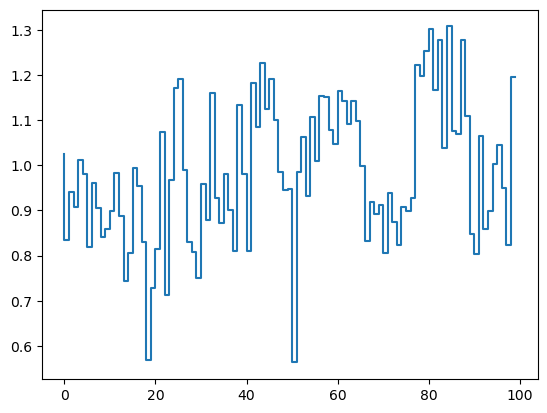

In [21]:
plt.step(np.arange(n),s.value)
plt.show()